# Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Adjust the file path as needed
data = pd.read_csv("/content/superstore_data.csv")

# Display the first few rows to understand the structure
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Month,Order Year,Processing Time,Profit Margin,Discounted Order,Order Cost Category
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.913600,11,2016,3,16.0000,0,High-Cost
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.582000,11,2016,3,30.0000,0,High-Cost
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.871400,6,2016,4,47.0000,0,Low-Cost
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-319.264953,10,2015,7,-33.3409,1,High-Cost
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.516400,10,2015,7,11.2500,1,Medium-Cost


## Descriptive Statistics

In [ ]:
# Descriptive Statistics on numerical columns of Sales, Profit, Quantity, Discount
print("Descriptive Statistics:")
print(data[['Sales', 'Profit', 'Quantity', 'Discount']].describe())

# Set up the style for seaborn visualizations
sns.set(style="whitegrid")

Descriptive Statistics:
             Sales       Profit     Quantity     Discount
count  9994.000000  9994.000000  9994.000000  9994.000000
mean    209.365508    26.307032     3.789574     0.156203
std     394.795901    97.564856     2.225110     0.206452
min       2.286000  -319.264953     1.000000     0.000000
25%      17.280000     1.728750     2.000000     0.000000
50%      54.490000     8.666500     3.000000     0.200000
75%     209.940000    29.364000     5.000000     0.200000
max    2481.694600   580.657882    14.000000     0.800000


**Explanation:**
- Descriptive Statistics: The '.describe()' method computes summary statistics (e.g. mean, min, max, etc) for the specified numerical columns.
- Visualization Style: 'sns.set(style="whitegrid")' sets a clean grid style for visualizations.

**Interpretation:**
- The mean 'Sales' is 209.37, with a maximum of 2481.69, indicating a skewed distribution.
- Profit rangees from -319.26 to 580.65, showing some losses.
- Discount is mostly low (mean 0.15) with a maximum of 0.8 (80%).

## Sales and Profit trends over time

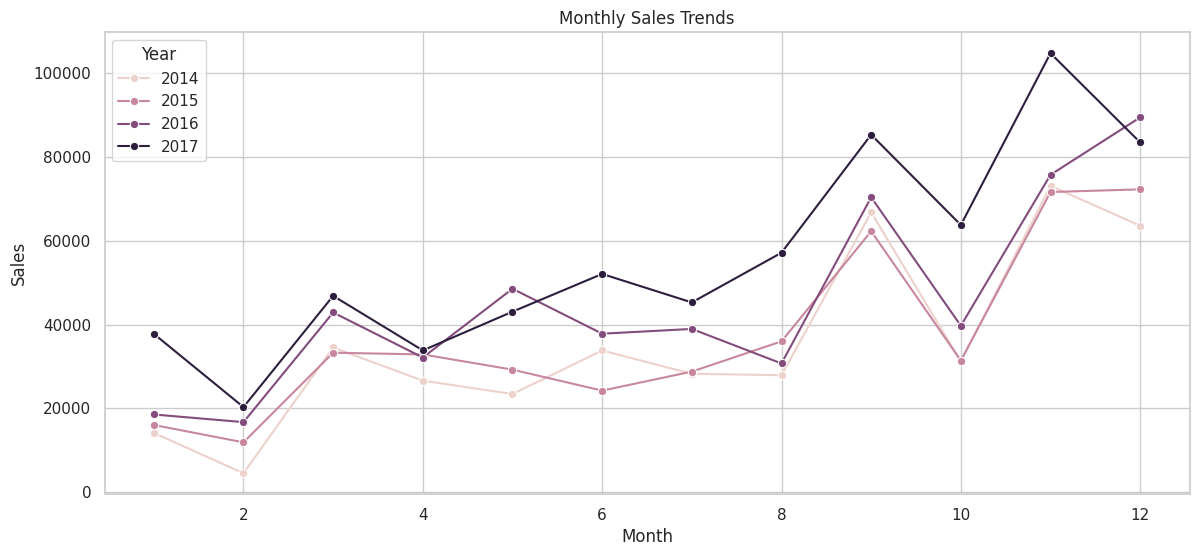

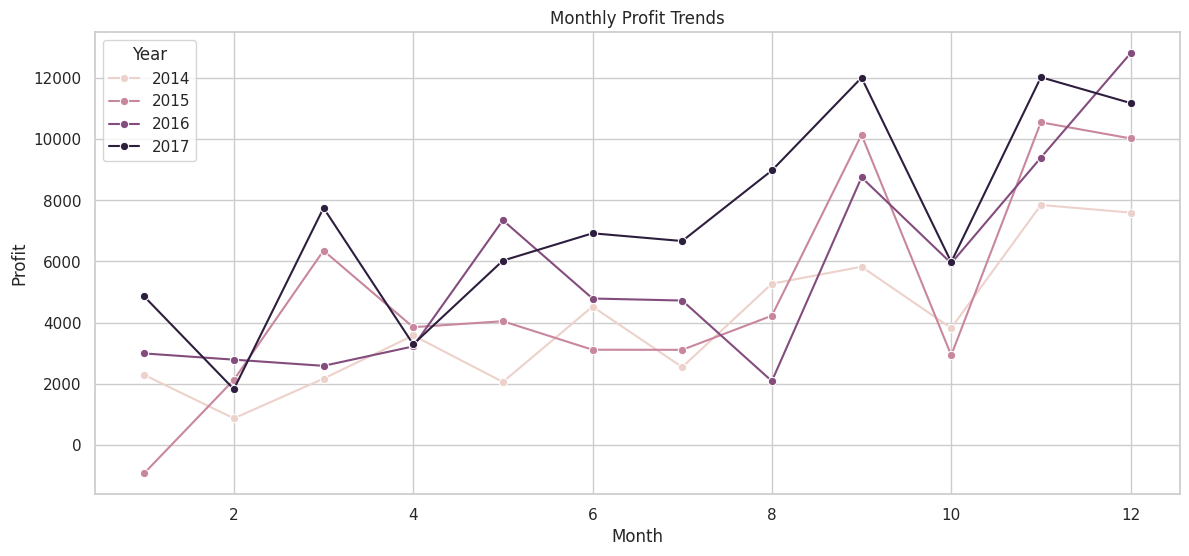

In [ ]:
# Convert 'Order Date' to datetime format if not already
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year and month for time-based analysis
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

# Monthly Sales and Profit Trends
monthly_data = data.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Monthly sales trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_data, x="Order Month", y="Sales", hue="Order Year", marker="o")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Year")
plt.show()

# Monthly profit trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_data, x="Order Month", y="Profit", hue="Order Year", marker="o")
plt.title("Monthly Profit Trends")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.legend(title="Year")
plt.show()

**Interpretation:**
- Sales follow a seasonal trend, with peaks in specific months (likely influenced by holidays or promotions).
- Comparing years reveals change in performance over time.

## Category and Sub-Category Insights

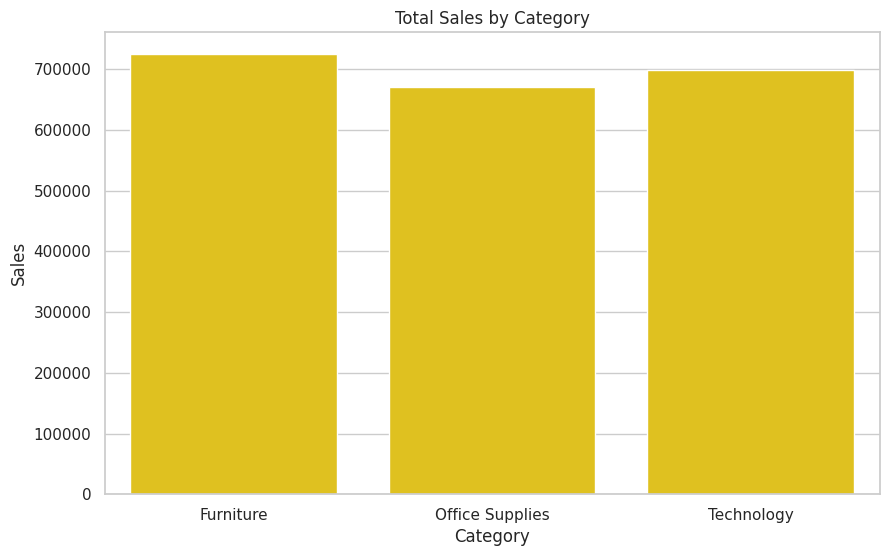

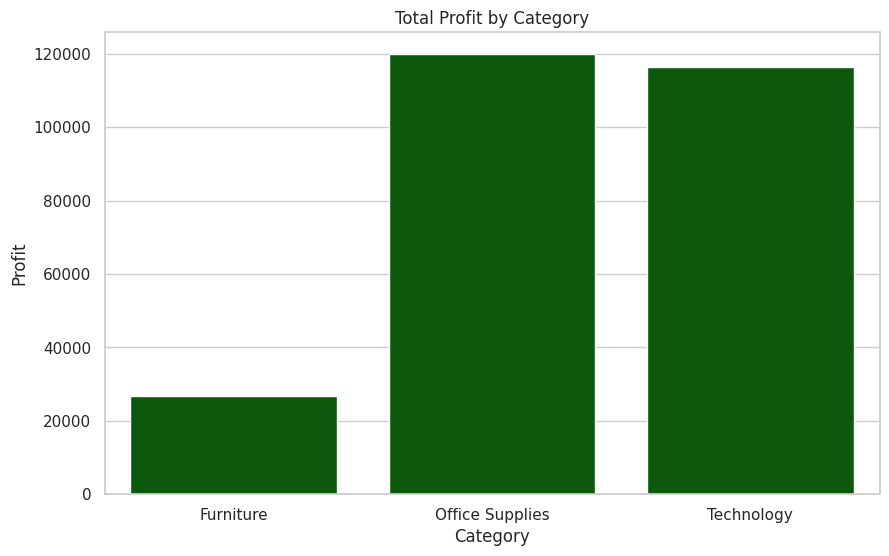

In [ ]:
# Sales and Profit by Category
category_data = data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Total Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_data, color='gold' )
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

# Total Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=category_data, color='darkgreen')
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

**Interpretation:** Some categories (e.g., Technology) generate higher sales and profits compared to others (e.g., Furniture).

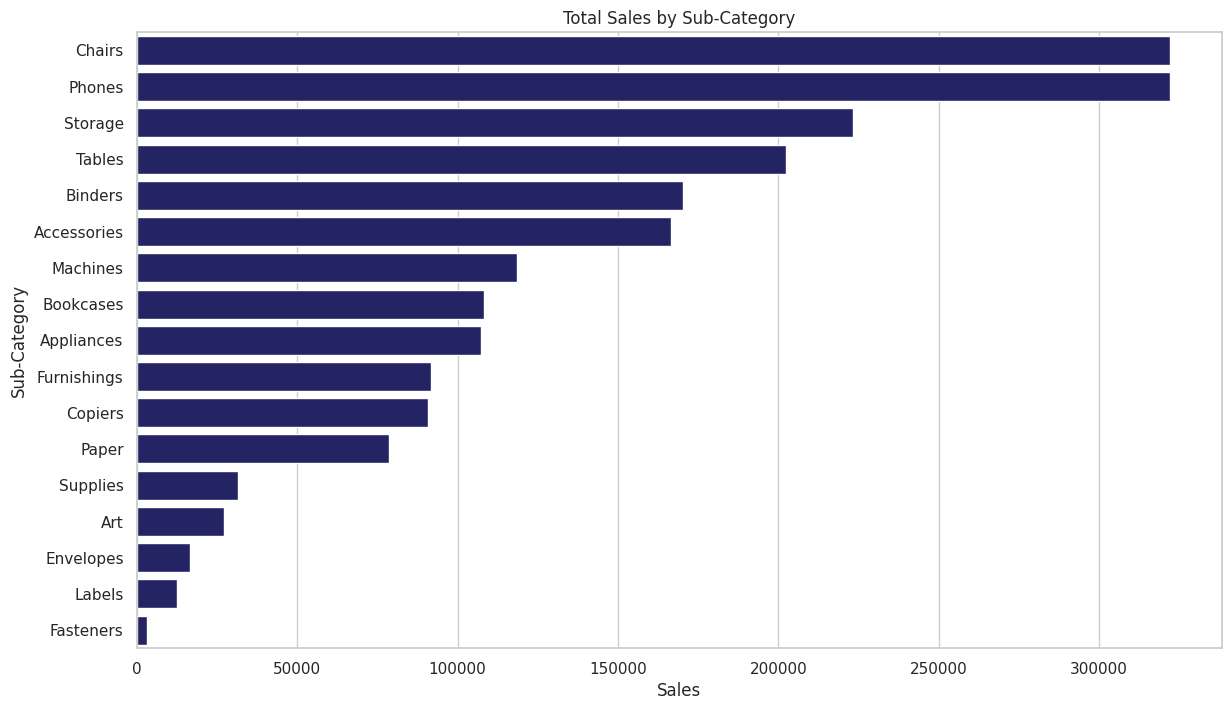

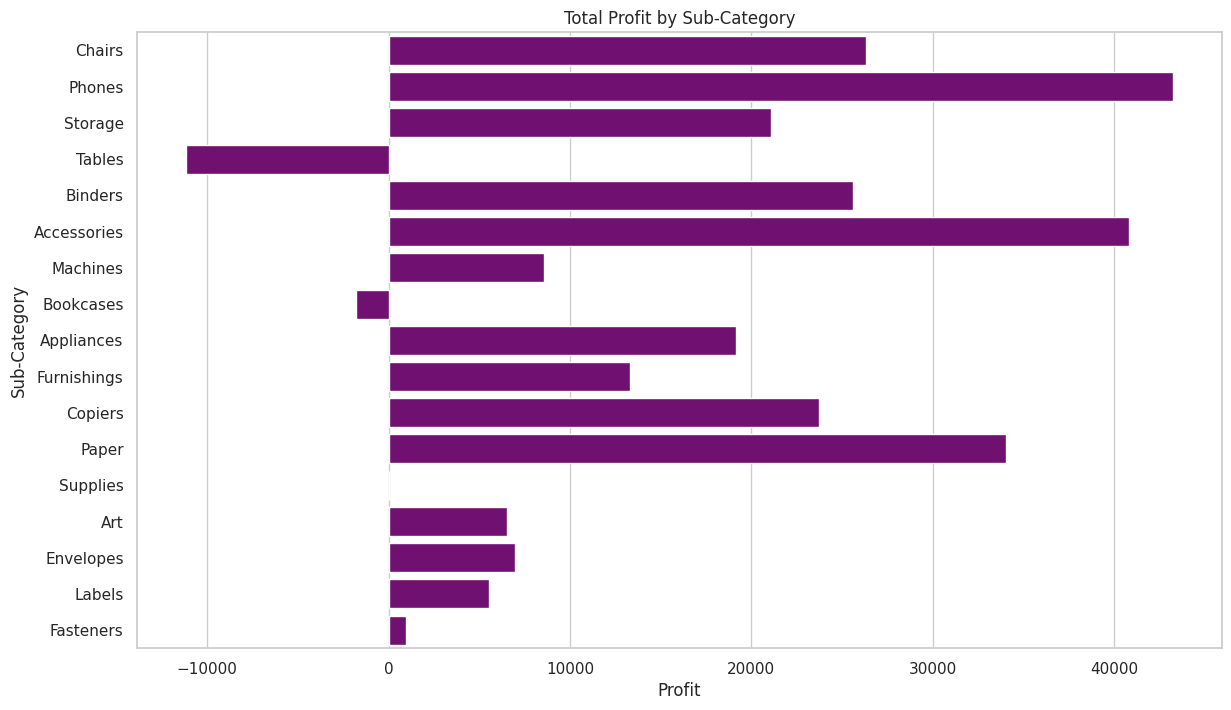

In [ ]:
# Sales and Profit by Sub-Category
sub_category_data = data.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sub_category_data = sub_category_data.sort_values(by='Sales', ascending=False)

# Total Sales by Sub-Category
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Sub-Category', data=sub_category_data,color='midnightblue')
plt.title("Total Sales by Sub-Category")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
plt.show()

# Total Profit by Sub-Category
plt.figure(figsize=(14, 8))
sns.barplot(x='Profit', y='Sub-Category', data=sub_category_data, color='purple')
plt.title("Total Profit by Sub-Category")
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.show()

**Interpretation:** Sub-categories like Phones and Chairs contribute significantly to total sales, while others (e.g., Bookcases) perform less well.

## Regional Analysis

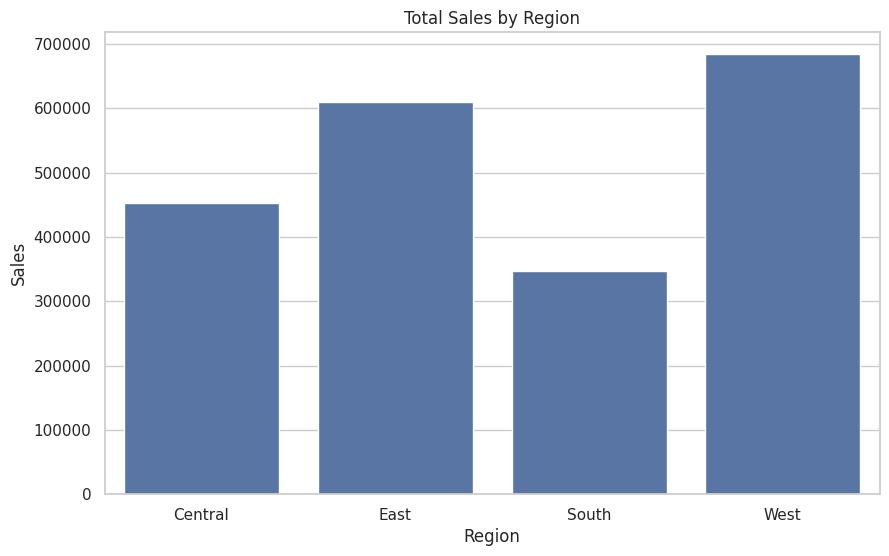

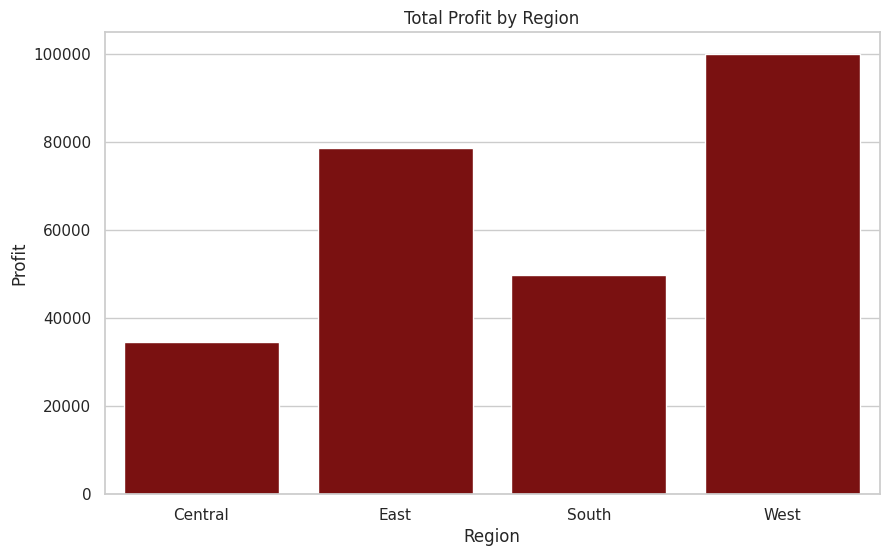

In [ ]:
# Sales and Profit by Region
region_data = data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Total Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_data)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

# Total Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_data, color='darkred')
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

**Interpretation:** Certain regions (e.g., West) outperform others in terms of both sales and profit, indicating better market performance.

## Discount Impact on Profit

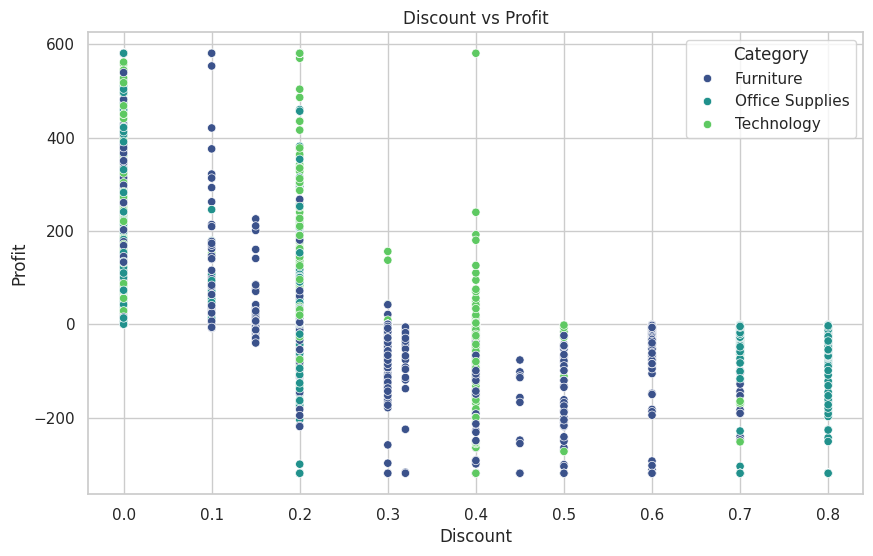

In [ ]:
# Scatter plot to see if there's a relationship between Discount and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=data, hue='Category', palette='viridis')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

**Interpretation:** High discounts often correlate with lower profits, but this varies by category. For example, some categories might maintain profitability even with discounts.